In [230]:
import numpy as np
import pandas as pd

## Load Dataset

In [231]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-02-07 08:00:00,1,0,1,2,6.56,11.365,100,0.0,7,223,230
1,2011-02-05 06:00:00,1,0,0,3,8.20,12.880,100,0.0,0,4,4
2,2011-02-02 10:00:00,1,0,1,2,9.02,13.635,100,0.0,2,59,61
3,2011-02-05 14:00:00,1,0,0,3,9.02,13.635,100,0.0,5,50,55
4,2011-02-05 15:00:00,1,0,0,3,9.02,13.635,100,0.0,11,49,60


In [232]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [233]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

train["day_mon"]= train["datetime"].dt.dayofweek==0
train["day_tue"]= train["datetime"].dt.dayofweek==1
train["day_wed"]= train["datetime"].dt.dayofweek==2
train["day_thi"]= train["datetime"].dt.dayofweek==3
train["day_fri"]= train["datetime"].dt.dayofweek==4
train["day_sat"]= train["datetime"].dt.dayofweek==5
train["day_sun"]= train["datetime"].dt.dayofweek==6

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 26)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-02-07 08:00:00,2011,2,7,8,0,0,0
1,2011-02-05 06:00:00,2011,2,5,6,0,0,5
2,2011-02-02 10:00:00,2011,2,2,10,0,0,2
3,2011-02-05 14:00:00,2011,2,5,14,0,0,5
4,2011-02-05 15:00:00,2011,2,5,15,0,0,5


In [234]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

#mon이 0 (아마도?)
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek
test["day_mon"]= test["datetime"].dt.dayofweek==0
test["day_tue"]= test["datetime"].dt.dayofweek==1
test["day_wed"]= test["datetime"].dt.dayofweek==2
test["day_thi"]= test["datetime"].dt.dayofweek==3
test["day_fri"]= test["datetime"].dt.dayofweek==4
test["day_sat"]= test["datetime"].dt.dayofweek==5
test["day_sun"]= test["datetime"].dt.dayofweek==6


In [235]:
print(test.shape)
# test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()
# test[["day_mon", "day_tue", "day_wed", "day_thi", "day_fri", "day_sat", "day_sun"]]

(6493, 23)


## Explore

In [236]:
%matplotlib inline
import seaborn as sns

### datetime

In [237]:
import matplotlib.pyplot as plt

In [238]:
# figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
# figure.set_size_inches(18, 8)

# sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
# sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
# sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
# sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
# sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
# sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### 넣은 칼럼 다 보기

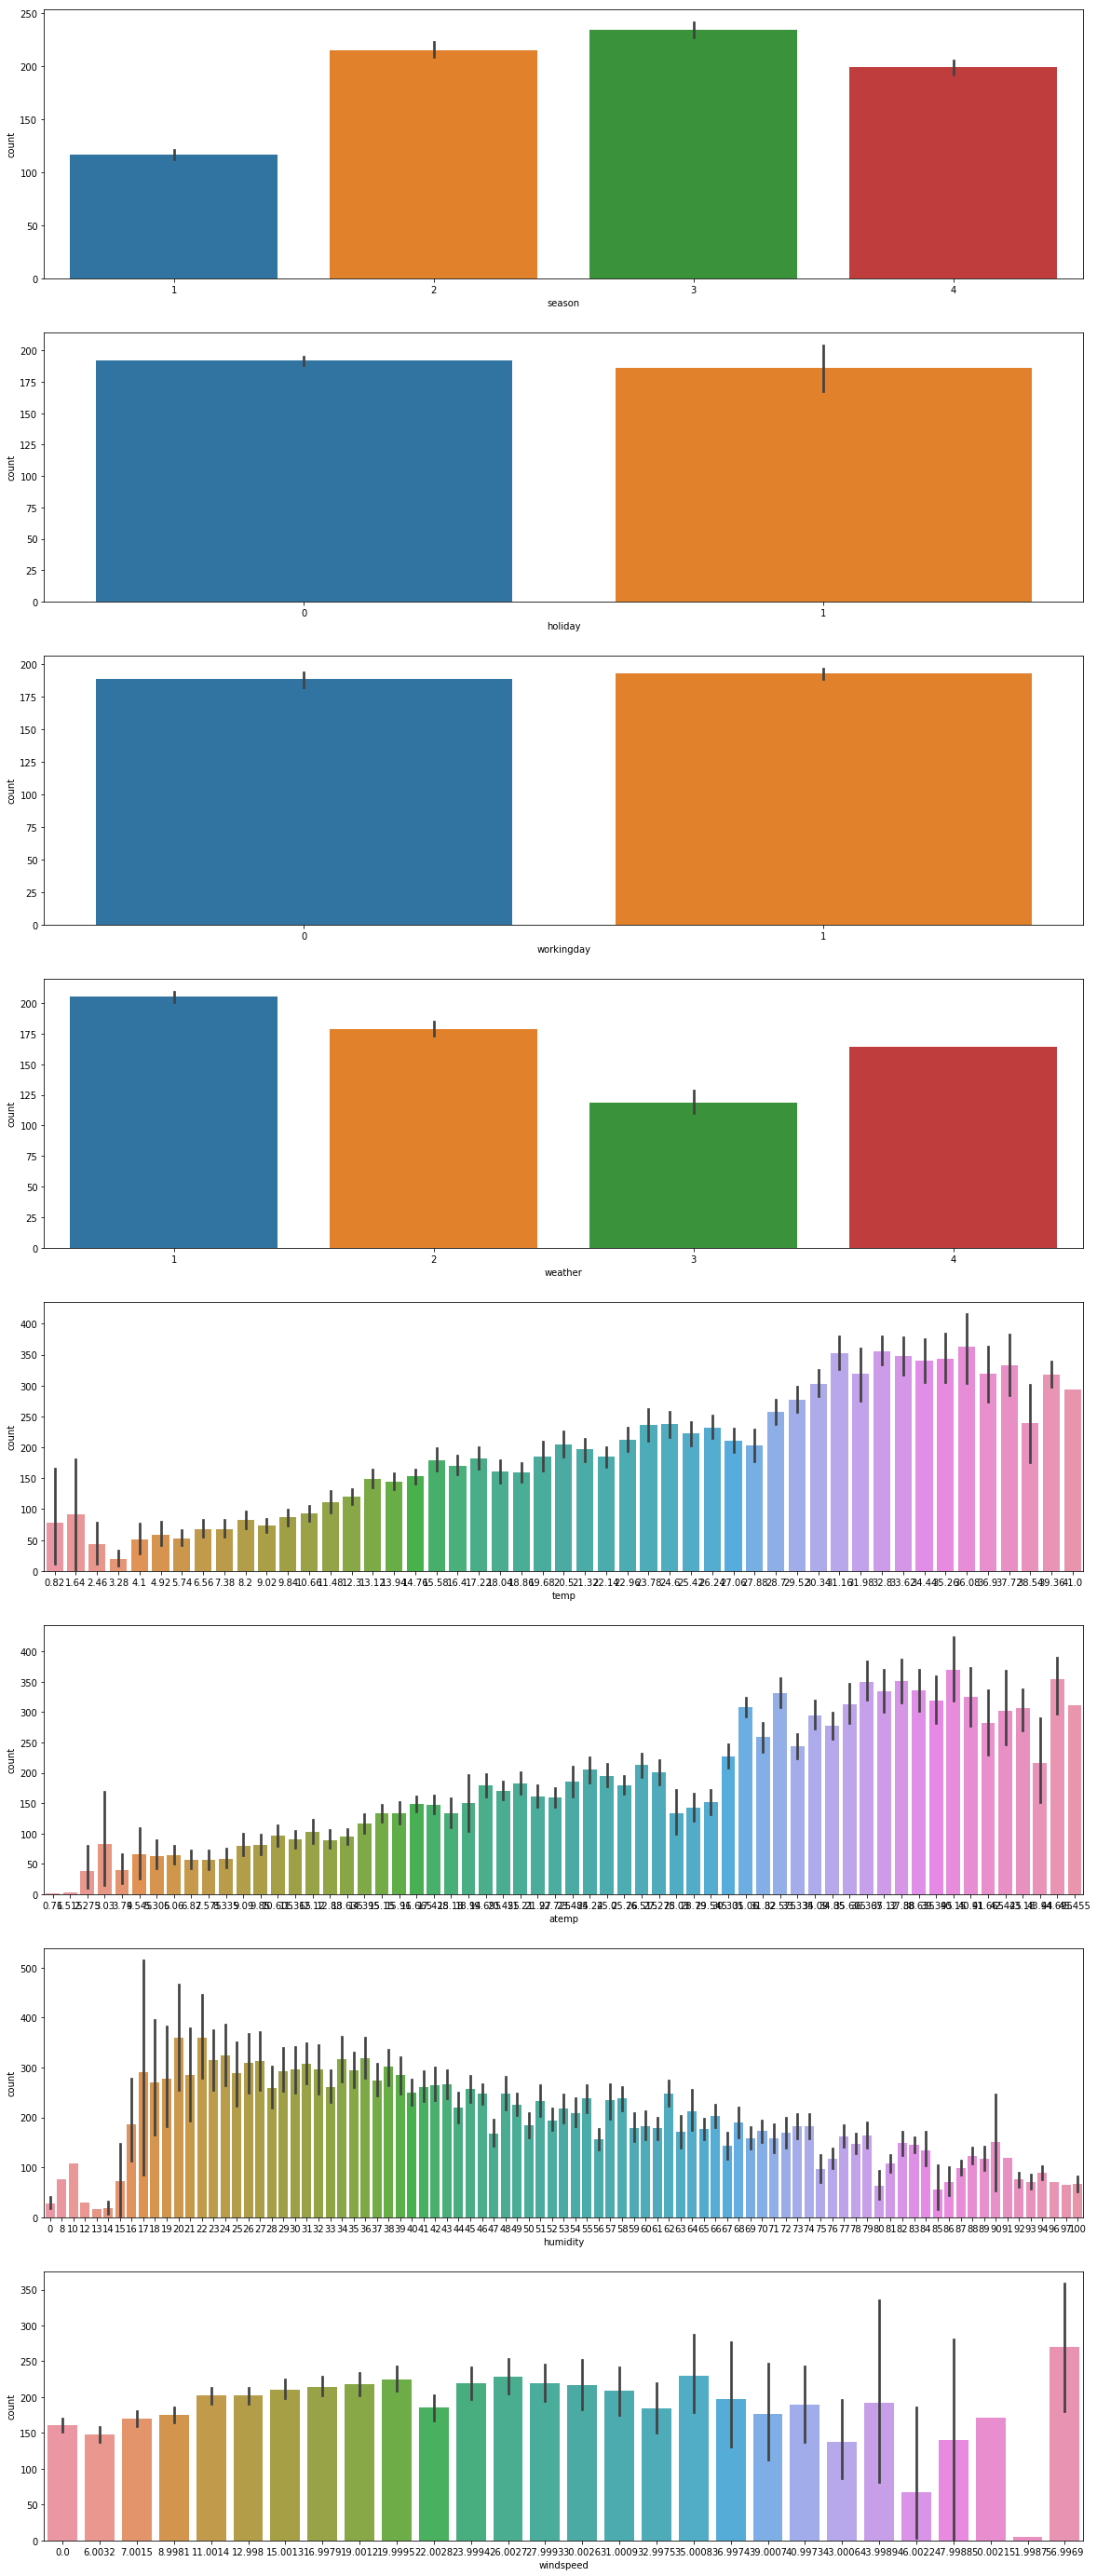

In [239]:
figure, ((ax1), (ax2),(ax3), (ax4),(ax5), (ax6),(ax7), (ax8)) = plt.subplots(nrows=8, ncols=1)
figure.set_size_inches(20, 50)

sns.barplot(data=train, x="season", y="count", ax=ax1)
sns.barplot(data=train, x="holiday", y="count", ax=ax2)
sns.barplot(data=train, x="workingday", y="count", ax=ax3)
sns.barplot(data=train, x="weather", y="count", ax=ax4)

sns.barplot(data=train, x="temp", y="count", ax=ax5)
sns.barplot(data=train, x="atemp", y="count", ax=ax6)
sns.barplot(data=train, x="humidity", y="count", ax=ax7)
sns.barplot(data=train, x="windspeed", y="count", ax=ax8)

In [240]:
# int == integer == 숫자
# str == string == 문자열
train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype('str')

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 27)


,datetime,datetime-year_month
0,2011-02-07 08:00:00,2011-2
1,2011-02-05 06:00:00,2011-2
2,2011-02-02 10:00:00,2011-2
3,2011-02-05 14:00:00,2011-2
4,2011-02-05 15:00:00,2011-2


In [241]:
# import matplotlib.pyplot as plt

# figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# figure.set_size_inches(18, 4)

# sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
# sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# figure, ax3 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18, 4)

# sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

In [242]:
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18, 4)

# sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)

# figure, ax2 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18, 4)
# # 요일별로 보고 싶다
# sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

## Score

In [243]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", 
                 "day_mon", "day_tue", "day_wed", "day_thi", "day_fri", "day_sat", "day_sun"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,day_mon,day_tue,day_wed,day_thi,day_fri,day_sat,day_sun
0,1,0,1,2,6.56,11.365,100,0.0,2011,8,True,False,False,False,False,False,False
1,1,0,0,3,8.20,12.880,100,0.0,2011,6,False,False,False,False,False,True,False
2,1,0,1,2,9.02,13.635,100,0.0,2011,10,False,False,True,False,False,False,False
3,1,0,0,3,9.02,13.635,100,0.0,2011,14,False,False,False,False,False,True,False
4,1,0,0,3,9.02,13.635,100,0.0,2011,15,False,False,False,False,False,True,False


In [244]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,day_mon,day_tue,day_wed,day_thi,day_fri,day_sat,day_sun
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,False,False,False,True,False,False,False
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,False,False,False,True,False,False,False
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,False,False,False,True,False,False,False
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,False,False,False,True,False,False,False
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,False,False,False,True,False,False,False


In [245]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    230
1      4
2     61
3     55
4     60
Name: count, dtype: int64

### 나무 투표

In [246]:
from sklearn.ensemble import RandomForestRegressor

seed = 37

model = RandomForestRegressor(random_state=seed)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

** Score ** = Root Mean Squared Logarithmic Error, RMSLE.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [247]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [248]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))

Score = 0.34769


## Submit

In [249]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [250]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[:3]

(6493,)


array([ 9.2,  3.8,  3. ])

In [251]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.2
1,2011-01-20 01:00:00,3.8
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,3.6
4,2011-01-20 04:00:00,2.9


In [252]:
submission.to_csv("fromTeach1203_wind.csv", index=False)